In [1]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading CSV file 
url = 'preprocessed_diabetes.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_category
0,0,80.0,0,1,Never,25.19,0.989693,0.040538,0,Overweight
1,0,54.0,0,0,Never,27.32,0.989693,-1.421307,0,Overweight
2,1,28.0,0,0,Never,27.32,0.152614,0.479091,0,Overweight
3,0,36.0,0,0,Current,23.45,-0.498447,0.405999,0,Normal
4,1,76.0,1,1,Current,20.14,-0.684464,0.405999,0,Normal


In [4]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes',
       'bmi_category'],
      dtype='object')

In [5]:
#### Encoding smoking history column
encoder = OrdinalEncoder(categories=[['Never', 'Current', 'Former', 'Ever', 'Not current']])
df['smoking_encoded'] = encoder.fit_transform(df[['smoking_history']])

## 1. LOGISTIC REGRESSION

#### Split the Data into training and test dataset

In [6]:
# Seperating target and features
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_encoded', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df[['diabetes']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Fitting the Logistic Regression Model

In [7]:
# Creating a logistic regression model
model = LogisticRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

C:\Users\alank\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alank\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Making Predictions

In [8]:
y_pred = model.predict(X_test)

In [9]:
# Probability for class 1
y_prob = model.predict_proba(X_test)[:, 1]  

#### Model Evaluation

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 95.68


#### Confusion Matrix

In [11]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16942   163]
 [  649  1056]]


#### Precision and Recall Matrix

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17105
           1       0.87      0.62      0.72      1705

    accuracy                           0.96     18810
   macro avg       0.91      0.80      0.85     18810
weighted avg       0.95      0.96      0.95     18810



#### Interpretation of Model Coefficients

In [13]:
# Model coefficients (weights)
coefficients = model.coef_
print(f"Model Coefficients: {coefficients}")

Model Coefficients: [[0.09341469 0.04414219 0.59751073 0.97649624 0.04914357 0.11606076
  2.58226025 1.3901186 ]]


#### Tuning and Cross-Validation

In [14]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Using GridSearchCV to search for the best parameters
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(grid_search.best_params_)


C:\Users\alank\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alank\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alank\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

{'C': 0.1}


C:\Users\alank\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Visaulization

#### Confusion matrix

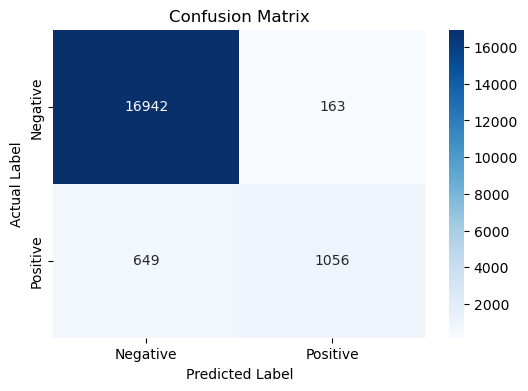

In [15]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

#### Actual vs Predicted Values

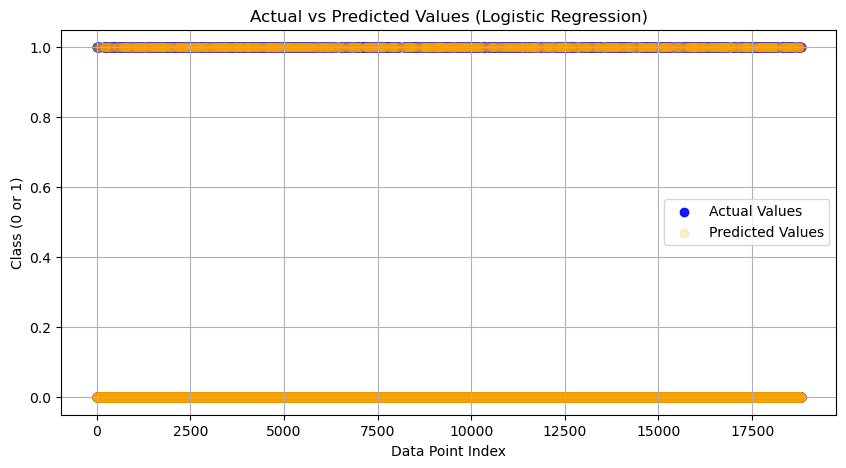

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.9, label='Actual Values')
plt.scatter(range(len(y_test)), y_pred, color='orange', alpha=0.2, label='Predicted Values')
plt.title('Actual vs Predicted Values (Logistic Regression)')
plt.xlabel('Data Point Index')
plt.ylabel('Class (0 or 1)')
plt.legend()
plt.grid(True)
plt.show()


#### Precision Recall vs Threshold

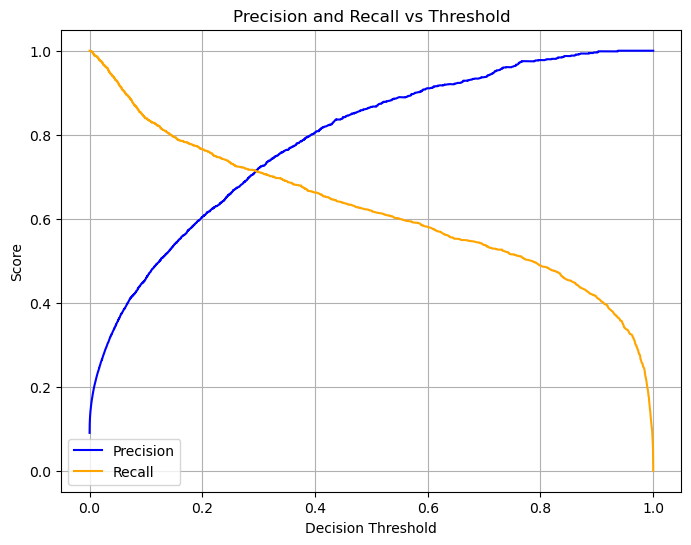

In [17]:
# Computing precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plotting Precision-Recall vs Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision", color="blue")
plt.plot(thresholds, recall[:-1], label="Recall", color="orange")
plt.title('Precision and Recall vs Threshold')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid(True)
plt.show()


## 2. Decision Tree

In [18]:
# Importing required libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree

#### Training the model

In [19]:
# Creating a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fitting the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Predictions

In [20]:
# Making predictions on the test set
y_pred = dt_classifier.predict(X_test)

#### Model Evaluation

In [21]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ",conf_matrix)

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17105
           1       0.72      0.74      0.73      1705

    accuracy                           0.95     18810
   macro avg       0.85      0.85      0.85     18810
weighted avg       0.95      0.95      0.95     18810

Confusion Matrix:  [[16611   494]
 [  451  1254]]


## Visualization

#### Confusion Matrix

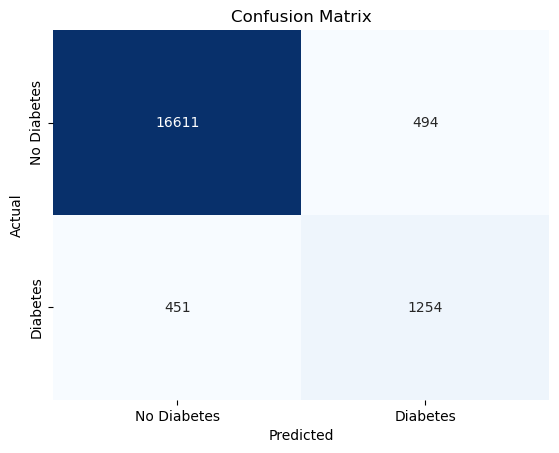

In [22]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Trained Decision tree

In [ ]:
# Plot the decision tree
plt.figure(figsize=(200, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()